In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import collections
from collections import Counter
from sklearn import preprocessing
from tqdm import tqdm
# import skimage
# from skimage.color import rgb2hsv

In [5]:
feature_path = '/home/DL-based-Tumor-Classification/Datasets/Newest_case/1D_sorted/'
kamus = {'OSCC':1,'Non-oral':2,'Cervical':3,'EsophagealSCC':4,'EsophagealAdenocarcinoma':5,'EsophagealCancer':6}
cases = os.listdir(feature_path)
#  fold = 4
for fold in range(4,10):
    print("FOLD {}".format(fold))
    for case in tqdm(cases):
        classes = []
        path = os.path.join(feature_path,case)
        if os.path.isdir(path) and not case.endswith(".ipynb_checkpoints") and not case.startswith("1"):
            # only target OSCC related (fold 5++)
            if case.split('+')[0]!='OSCC':
                continue
            #####
            classes_all = case.split('+')
            for kelases in classes_all:
                classes.append(kamus[kelases])
            path_file = feature_path + case
            print("NOW IN FOLD: {}\nCASE: {}".format(fold,case))
            def_path= path_file +'/img_fold{}'.format(fold)
            default_path= def_path+'/Grads'
            imsize = 98
            for kelas in classes:
                file = []
                avg_img = []
                gray_file_0 = []
                for filename in os.listdir(default_path):
                    if filename.endswith(".ipynb_checkpoints"):
                        continue
                    file_name_seq = []
                    file_name_seq = filename.split("_")
                    if(file_name_seq[0] != 'guided-gradcam'):
                        continue
                    img_gray = cv2.imread(default_path+'/'+filename, cv2.IMREAD_GRAYSCALE)      
                    gray_seq = img_gray.reshape(imsize*imsize)

                    cam_type,code,img_name = filename.split("_",2)

                    if code == str(kelas):
                        gray_file_0.append(gray_seq)
                        avg_img.append(img_gray)

                kelas0_gray = np.asarray(gray_file_0)

                average0_gray = np.mean(kelas0_gray,axis=0)

                sum0_gray =  np.sum(kelas0_gray, axis=0)
                if np.max(sum0_gray) != 0:
                    normalized0_gray = sum0_gray / np.max(sum0_gray) * 255
                else:
                    normalized0_gray = sum0_gray * 0

                average_img = np.mean(avg_img,axis = 0)
                average_img = average_img.astype(np.uint8)

                top_400_kelas0 = np.argsort(average0_gray)[-800:]
                top_400_kelas0 = top_400_kelas0[::-1]

                top_400_kelas0_value = np.sort(average0_gray)[-800:]
                top_400_kelas0_value = top_400_kelas0_value[::-1]

                top_400_kelas0_norm = np.argsort(normalized0_gray)[-800:]
                top_400_kelas0_norm = top_400_kelas0_norm[::-1]

                top_400_kelas0_norm_val = np.sort(normalized0_gray)[-800:]
                top_400_kelas0_norm_val = top_400_kelas0_norm_val[::-1]

                df = pd.DataFrame(top_400_kelas0)
                df.to_csv(def_path+'/class_{}_top_800_mean.csv'.format(kelas), index=False)

                df = pd.DataFrame(top_400_kelas0_norm)
                df.to_csv(def_path+'/class_{}_top_800_norm.csv'.format(kelas), index=False)

                df = pd.DataFrame(top_400_kelas0_norm_val)
                df.to_csv(def_path+'/class_{}_top_800_norm_val.csv'.format(kelas), index=False)

                df_score = pd.DataFrame(top_400_kelas0_value)
                df_score.to_csv(def_path+'/class_{}_top_800_value.csv'.format(kelas), index=False)


  0%|          | 0/20 [00:00<?, ?it/s]

FOLD 4
NOW IN FOLD: 4
CASE: OSCC+Non-oral+Cervical+EsophagealSCC+EsophagealAdenocarcinoma


 55%|█████▌    | 11/20 [00:00<00:00, 13.14it/s]

NOW IN FOLD: 4
CASE: OSCC+Cervical
NOW IN FOLD: 4
CASE: OSCC+EsophagealSCC+EsophagealAdenocarcinoma


 60%|██████    | 12/20 [00:01<00:01,  7.88it/s]

NOW IN FOLD: 4
CASE: OSCC+Cervical+EsophagealCancer


 80%|████████  | 16/20 [00:01<00:00,  6.83it/s]

NOW IN FOLD: 4
CASE: OSCC+EsophagealSCC
NOW IN FOLD: 4
CASE: OSCC+Non-oral+Cervical+EsophagealSCC


 90%|█████████ | 18/20 [00:02<00:00,  5.01it/s]

NOW IN FOLD: 4
CASE: OSCC+Non-oral
NOW IN FOLD: 4
CASE: OSCC+Cervical+EsophagealSCC


  0%|          | 0/20 [00:00<?, ?it/s]

FOLD 5
NOW IN FOLD: 5
CASE: OSCC+Non-oral+Cervical+EsophagealSCC+EsophagealAdenocarcinoma


 55%|█████▌    | 11/20 [00:00<00:00, 13.31it/s]

NOW IN FOLD: 5
CASE: OSCC+Cervical
NOW IN FOLD: 5
CASE: OSCC+EsophagealSCC+EsophagealAdenocarcinoma


 60%|██████    | 12/20 [00:01<00:00,  8.26it/s]

NOW IN FOLD: 5
CASE: OSCC+Cervical+EsophagealCancer


 80%|████████  | 16/20 [00:01<00:00,  6.88it/s]

NOW IN FOLD: 5
CASE: OSCC+EsophagealSCC
NOW IN FOLD: 5
CASE: OSCC+Non-oral+Cervical+EsophagealSCC


 90%|█████████ | 18/20 [00:02<00:00,  5.03it/s]

NOW IN FOLD: 5
CASE: OSCC+Non-oral
NOW IN FOLD: 5
CASE: OSCC+Cervical+EsophagealSCC


  0%|          | 0/20 [00:00<?, ?it/s]

FOLD 6
NOW IN FOLD: 6
CASE: OSCC+Non-oral+Cervical+EsophagealSCC+EsophagealAdenocarcinoma


 55%|█████▌    | 11/20 [00:00<00:00, 13.45it/s]

NOW IN FOLD: 6
CASE: OSCC+Cervical
NOW IN FOLD: 6
CASE: OSCC+EsophagealSCC+EsophagealAdenocarcinoma


 60%|██████    | 12/20 [00:01<00:01,  7.93it/s]

NOW IN FOLD: 6
CASE: OSCC+Cervical+EsophagealCancer


 80%|████████  | 16/20 [00:01<00:00,  6.82it/s]

NOW IN FOLD: 6
CASE: OSCC+EsophagealSCC
NOW IN FOLD: 6
CASE: OSCC+Non-oral+Cervical+EsophagealSCC


 90%|█████████ | 18/20 [00:02<00:00,  4.28it/s]

NOW IN FOLD: 6
CASE: OSCC+Non-oral
NOW IN FOLD: 6
CASE: OSCC+Cervical+EsophagealSCC


  0%|          | 0/20 [00:00<?, ?it/s]

FOLD 7
NOW IN FOLD: 7
CASE: OSCC+Non-oral+Cervical+EsophagealSCC+EsophagealAdenocarcinoma


 55%|█████▌    | 11/20 [00:00<00:00, 13.28it/s]

NOW IN FOLD: 7
CASE: OSCC+Cervical
NOW IN FOLD: 7
CASE: OSCC+EsophagealSCC+EsophagealAdenocarcinoma


 60%|██████    | 12/20 [00:01<00:00,  8.23it/s]

NOW IN FOLD: 7
CASE: OSCC+Cervical+EsophagealCancer


 80%|████████  | 16/20 [00:01<00:00,  6.79it/s]

NOW IN FOLD: 7
CASE: OSCC+EsophagealSCC
NOW IN FOLD: 7
CASE: OSCC+Non-oral+Cervical+EsophagealSCC


 90%|█████████ | 18/20 [00:02<00:00,  4.51it/s]

NOW IN FOLD: 7
CASE: OSCC+Non-oral
NOW IN FOLD: 7
CASE: OSCC+Cervical+EsophagealSCC


  0%|          | 0/20 [00:00<?, ?it/s]

FOLD 8
NOW IN FOLD: 8
CASE: OSCC+Non-oral+Cervical+EsophagealSCC+EsophagealAdenocarcinoma


 55%|█████▌    | 11/20 [00:00<00:00, 12.76it/s]

NOW IN FOLD: 8
CASE: OSCC+Cervical
NOW IN FOLD: 8
CASE: OSCC+EsophagealSCC+EsophagealAdenocarcinoma


 60%|██████    | 12/20 [00:01<00:00,  8.26it/s]

NOW IN FOLD: 8
CASE: OSCC+Cervical+EsophagealCancer


 80%|████████  | 16/20 [00:01<00:00,  6.48it/s]

NOW IN FOLD: 8
CASE: OSCC+EsophagealSCC
NOW IN FOLD: 8
CASE: OSCC+Non-oral+Cervical+EsophagealSCC


 90%|█████████ | 18/20 [00:02<00:00,  4.84it/s]

NOW IN FOLD: 8
CASE: OSCC+Non-oral
NOW IN FOLD: 8
CASE: OSCC+Cervical+EsophagealSCC


  0%|          | 0/20 [00:00<?, ?it/s]

FOLD 9
NOW IN FOLD: 9
CASE: OSCC+Non-oral+Cervical+EsophagealSCC+EsophagealAdenocarcinoma


 55%|█████▌    | 11/20 [00:00<00:00, 12.43it/s]

NOW IN FOLD: 9
CASE: OSCC+Cervical
NOW IN FOLD: 9
CASE: OSCC+EsophagealSCC+EsophagealAdenocarcinoma


 60%|██████    | 12/20 [00:01<00:01,  7.53it/s]

NOW IN FOLD: 9
CASE: OSCC+Cervical+EsophagealCancer


 80%|████████  | 16/20 [00:01<00:00,  6.74it/s]

NOW IN FOLD: 9
CASE: OSCC+EsophagealSCC
NOW IN FOLD: 9
CASE: OSCC+Non-oral+Cervical+EsophagealSCC


 90%|█████████ | 18/20 [00:02<00:00,  4.42it/s]

NOW IN FOLD: 9
CASE: OSCC+Non-oral
NOW IN FOLD: 9
CASE: OSCC+Cervical+EsophagealSCC


100%|██████████| 20/20 [00:02<00:00,  4.75it/s]


In [2]:
i = 0
print("NOW IN FOLD: {}".format(i))
def_path='/home/DL-based-Tumor-Classification/Datasets/Newest_case/Oral+Esophageal+Cervical98/img_fold{}'.format(i)
default_path=def_path+'/CAM2'
feature_path = '/home/DL-based-Tumor-Classification/Datasets/Newest_case'

filename = "0_Cam_0.jpg"

img = cv2.imread(default_path+'/'+filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

lower_red = (0,120,80)
upper_red = (45,255,255)
mask = cv2.inRange(hsv_img, lower_red, upper_red)
res = cv2.bitwise_and(img_rgb,img_rgb, mask=mask)

hsv = cv2.cvtColor(res, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
r,g,b = cv2.split(res)

NOW IN FOLD: 0


[[  0   0   0 ... 129 127 112]
 [  0   0   0 ... 117  98 111]
 [  0   0   0 ... 153 126 156]
 ...
 [  0 106 113 ... 116 130  89]
 [ 97 102 114 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


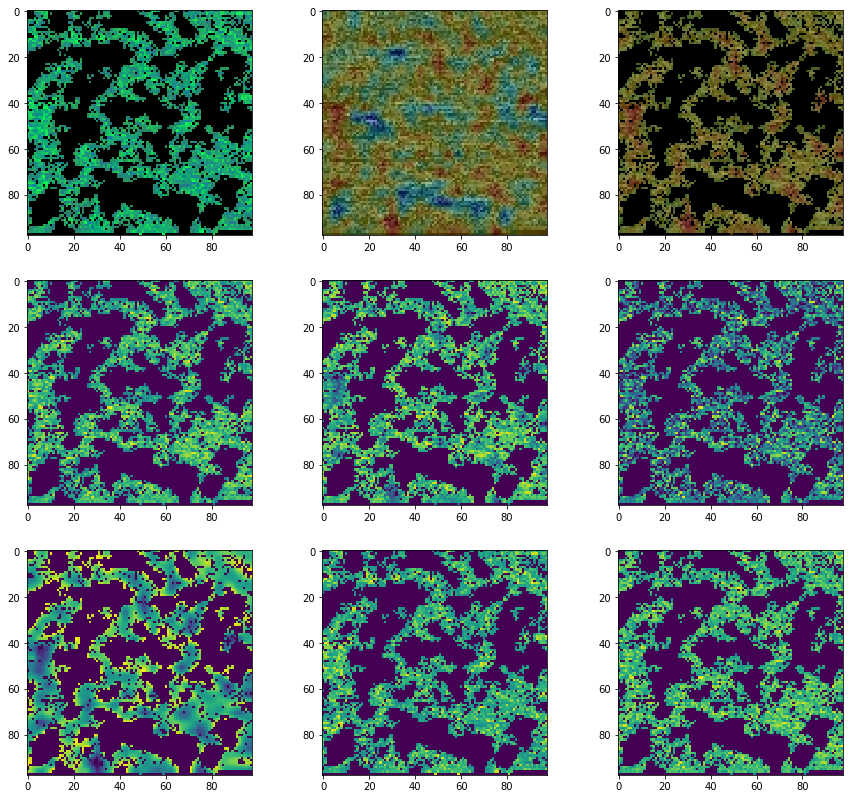

In [6]:
plt.figure(figsize=(15,24))
plt.subplot(5,3,1)
plt.imshow(hsv)
plt.subplot(5,3,2)
plt.imshow(img_rgb)
plt.subplot(5,3,3)
plt.imshow(res)
plt.subplot(5,3,4)
plt.imshow(r)
plt.subplot(5,3,5)
plt.imshow(g)
plt.subplot(5,3,6)
plt.imshow(b)
plt.subplot(5,3,7)
plt.imshow(h)
plt.subplot(5,3,8)
plt.imshow(s)
plt.subplot(5,3,9)
plt.imshow(v)
print(v)

In [25]:
print(r)

[[  0   0   0 ... 129 127 112]
 [  0   0   0 ... 117  98 111]
 [  0   0   0 ... 153 126 156]
 ...
 [  0  91 101 ... 116 130  89]
 [ 82  88 103 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
cv2.imshow("RES",res)

In [35]:
a = [[1,-1,1],[2,2,2],[-2,3,3]]
b = np.sum(a, axis = 0)
c = (b - np.min(b)) / np.max(b) * 100
print(b)
print(c)

[1 4 6]
[ 0.         50.         83.33333333]


In [4]:
top_400_kelas0 = np.argsort(average0_r)
top_400_kelas1 = np.argsort(average1_r)
top_400_values0 = [average0_r[i] for i in top_400_kelas0]
top_400_values1 = [average1_r[i] for i in top_400_kelas1]
value_1 = np.asarray(top_400_values0)
value_2 = np.asarray(top_400_values1)

In [5]:
top_400_kelas0 = np.argsort(average0_r)[-400:]
top_400_kelas1 = np.argsort(average1_r)[-400:]
print(top_400_kelas0)
print(top_400_kelas1)
df = pd.DataFrame(top_400_kelas0)
df.to_csv(def_path+'/class_1_panda.csv', index=False)
df1 = pd.DataFrame(top_400_kelas1)
df1.to_csv(def_path+'/class_2_panda.csv', index=False)
# top_400_values0 = [average0_r[i] for i in top_400_kelas0]
# top_200_values1 = [average1_r[i] for i in top_200_kelas1]
# print(np.asarray(top_400_values0))
# print(np.asarray(top_200_values1))

[4270 1974 2955  986 7733 7568 1465 3398 4717 7543 2514 2265 3193 2880
 6626 7578 4171 4760 3747 7867 5242 4858 4618 4712  985 6625 4872 6317
 2544 5859 7751 7177 6789 2778 4906 6133 5668 1032 7085 4656 3412 2605
 5864 2777  793 4955 6231 2135 2614 5857 5837 7633 2970 1849 3992 2328
 1712 5833 7577 6426 3052 5147 8736 5867 5674 7950 4088 4859 5760 4905
 7951 6624 8260 2449 1657 1562 3749 2543 6413 7538 1464 4807 7483 4139
 5941 3314 5866 4813 6153  578 6619 2034 3940  675 3056 4716 1753 3941
 4659 7635 7679 2961 3844 3897 6720 7495 5936 5769 6424 7675 6817 2860
 7083 2615 7487 2230 7952 2073 6616 2865 7677 4808 5935 1975 3700  577
 7642 2448 6329 7732 4856  676 8160 2039 4812 3798 7374 5844  773 7398
 1766 1846 8544 7540 7541 6032 6135 6036 3895 8258 7849 5937 3053 7373
  576 8353 4075  938 4617 4136 6811 6722 7560 4802 4970 7087  867 3304
 2424 6818 6816 8162 7753 2520 3413 8642 8547 8641 4971 6026 4896 1848
 7853 5865 6991 3648 4043 7676 6058 3601 3797 6059 7735 7180 2515 3553
 2447 

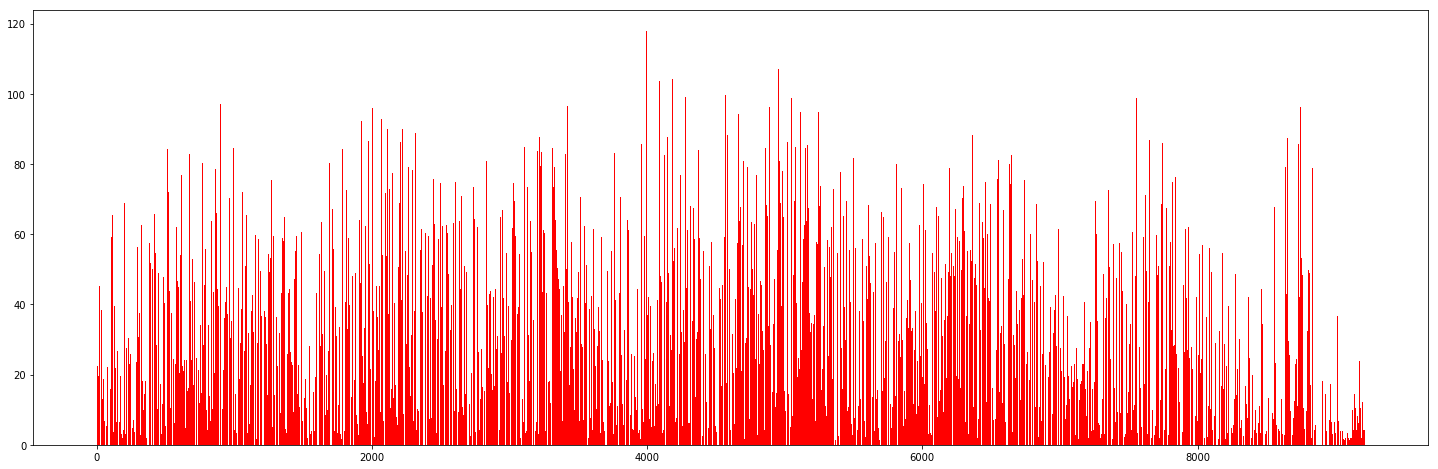

In [4]:
x = np.arange(imsize*imsize)
plt.figure(figsize=(25,8))
# plt.bar(x,h_seq, color= 'blue', label= 'blue',width = 1.4)
# plt.bar(x,s_seq, color = 'green', label= 'green',width = 1.4)
plt.bar(x,average0_r, color= 'red', label = 'red', width = 1.4)
plt.show()

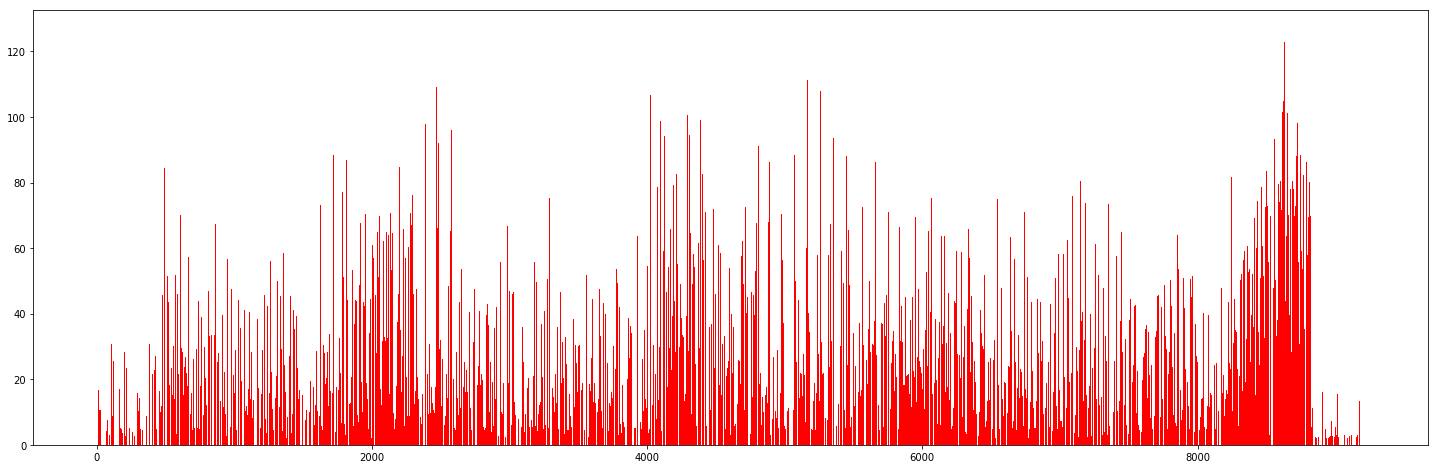

In [5]:
x = np.arange(imsize*imsize)
plt.figure(figsize=(25,8))
# plt.bar(x,h_seq, color= 'blue', label= 'blue',width = 1.4)
# plt.bar(x,s_seq, color = 'green', label= 'green',width = 1.4)
plt.bar(x,average1_r, color= 'red', label = 'red', width = 1.4)
plt.show()

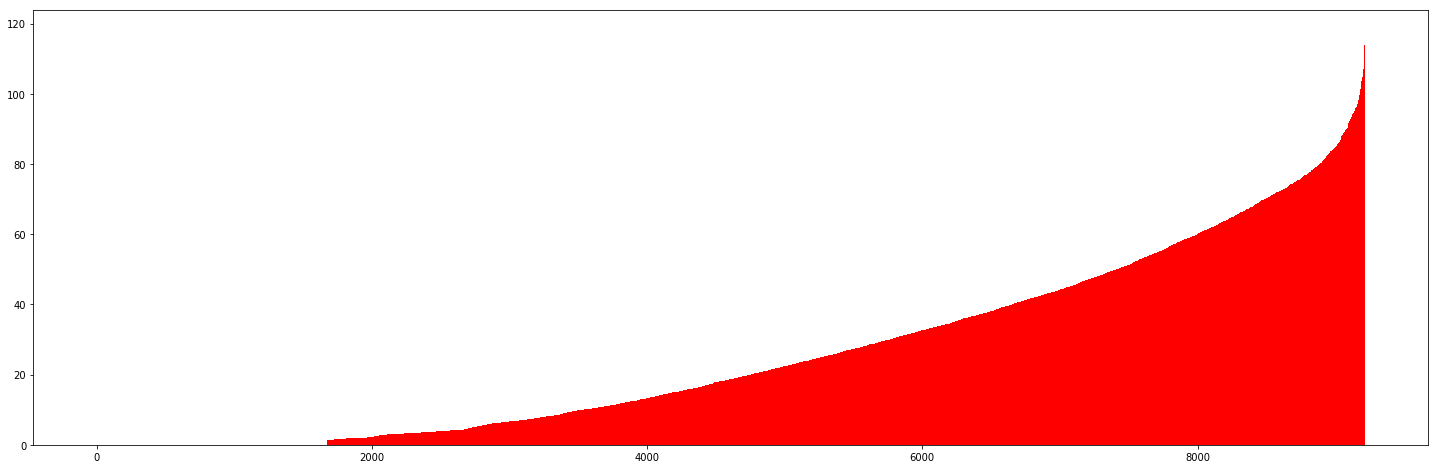

In [7]:
plt.figure(figsize=(25,8))
# plt.bar(x,h_seq, color= 'blue', label= 'blue',width = 1.4)
# plt.bar(x,s_seq, color = 'green', label= 'green',width = 1.4)
plt.bar(x,value_1, color= 'red', label = 'red', width = 1.4)
plt.show()

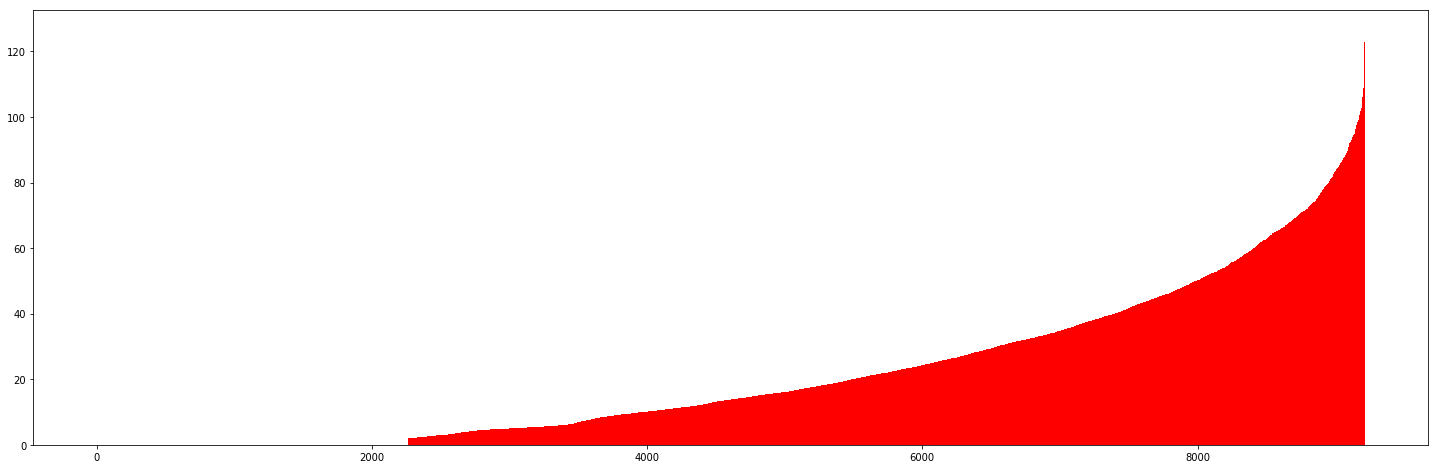

In [8]:
plt.figure(figsize=(25,8))
# plt.bar(x,h_seq, color= 'blue', label= 'blue',width = 1.4)
# plt.bar(x,s_seq, color = 'green', label= 'green',width = 1.4)
plt.bar(x,value_2, color= 'red', label = 'red', width = 1.4)
plt.show()

In [31]:
path = '/home/DL-based-Tumor-Classification/Table_datasets'
df = pd.read_csv(path+'/2ndappendedlabeled2.csv')
print(df)

     labels       0        1        2        3        4    5        6       7  \
0         1  0.0000   3.1490  12.8730  122.940  1429.10  0.0  266.210  0.0000   
1         1  0.1000  12.8560  11.8080  336.160  1927.70  0.0   39.309  0.0000   
2         1  0.2000  12.3170   3.7626  347.810  1492.70  0.0   77.717  0.0000   
3         1  0.3000  12.4540  11.6070  321.540   853.71  0.0   48.123  0.0000   
4         1  0.4000   5.6502   8.7235  267.940  1204.00  0.0   83.162  0.0000   
5         1  0.5000   4.1628   3.5757  148.800  1652.60  0.0   82.989  0.0000   
6         1  0.6000  11.0530   4.9834  156.490  1219.70  0.0   13.011  0.0000   
7         1  0.7000   6.3225   8.1849  173.130   829.62  0.0   65.452  0.0000   
8         1  0.8000   5.6514   9.8492  164.460   904.48  0.0   25.974  0.0000   
9         1  0.9000   5.5921  22.7940  242.640   989.05  0.0  187.750  0.0000   
10        1  0.1000  13.6590  30.0710  196.350  1120.60  0.0  120.900  0.0000   
11        1  0.1100   3.3354

In [36]:
data = df.loc[:,['labels']]
print(data)
data.to_csv(def_path)

     labels
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
..      ...
561       2
562       2
563       2
564       2
565       2
566       2
567       2
568       2
569       2
570       2
571       2
572       2
573       2
574       2
575       2
576       2
577       2
578       2
579       2
580       2
581       2
582       2
583       2
584       2
585       2
586       2
587       2
588       2
589       2
590       2

[591 rows x 1 columns]


In [ ]:
img = cv2.imread('resise.jpg')
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img1 = cv2.imread('Cam_0.jpg')
img2 = cv2.imread('Cam_Cervical_62.jpg')
img3 = cv2.imread('Cam_0_Oral.jpg')
img4 = cv2.imread('Cam_1_Oral.jpg')
img5 = cv2.imread('Cam_2_Oral.jpg')

In [7]:
img = cv2.imread('1_Cam_60.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img1 = cv2.imread('1_Cam_61.jpg')
img_rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
hsv_img1 = cv2.cvtColor(img_rgb1, cv2.COLOR_RGB2HSV)
img2 = cv2.imread('1_Cam_62.jpg')
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
hsv_img2 = cv2.cvtColor(img_rgb2, cv2.COLOR_RGB2HSV)
img3 = cv2.imread('1_Cam_63.jpg')
img_rgb3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
hsv_img3 = cv2.cvtColor(img_rgb3, cv2.COLOR_RGB2HSV)
img4 = cv2.imread('1_Cam_64.jpg')
img_rgb4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
hsv_img4 = cv2.cvtColor(img_rgb4, cv2.COLOR_RGB2HSV)
# hsv_seq = hsv_img.reshape(96*96,3)

In [8]:
lower_red = (0,120,80)
upper_red = (45,255,255)
mask = cv2.inRange(hsv_img, lower_red, upper_red)
res = cv2.bitwise_and(img_rgb,img_rgb, mask=mask)
mask1 = cv2.inRange(hsv_img1, lower_red, upper_red)
res1 = cv2.bitwise_and(img_rgb1,img_rgb1, mask=mask1)
mask2 = cv2.inRange(hsv_img2, lower_red, upper_red)
res2 = cv2.bitwise_and(img_rgb2,img_rgb2, mask=mask2)
mask3 = cv2.inRange(hsv_img3, lower_red, upper_red)
res3 = cv2.bitwise_and(img_rgb3,img_rgb3, mask=mask3)
mask4 = cv2.inRange(hsv_img4, lower_red, upper_red)
res4 = cv2.bitwise_and(img_rgb4,img_rgb4, mask=mask4)

In [10]:
res_save = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
res_save1 = cv2.cvtColor(res1, cv2.COLOR_RGB2BGR)
res_save2 = cv2.cvtColor(res2, cv2.COLOR_RGB2BGR)
res_save3 = cv2.cvtColor(res3, cv2.COLOR_RGB2BGR)
res_save4 = cv2.cvtColor(res4, cv2.COLOR_RGB2BGR)

In [7]:
cv2.imwrite('Oral_0.jpg',res_save)
cv2.imwrite('Oral_1.jpg',res_save1)
cv2.imwrite('Oral_2.jpg',res_save2)
cv2.imwrite('Oral_3.jpg',res_save3)
cv2.imwrite('Oral_4.jpg',res_save4)

True

In [12]:
cv2.imwrite('Cervical_60.jpg',res_save)
cv2.imwrite('Cervical_61.jpg',res_save1)
cv2.imwrite('Cervical_62.jpg',res_save2)
cv2.imwrite('Cervical_63.jpg',res_save3)
cv2.imwrite('Cervical_64.jpg',res_save4)

True

In [5]:
res_save = cv2.cvtColor(res, cv2.COLOR_RGB2BGR)
res_save1 = cv2.cvtColor(res1, cv2.COLOR_RGB2BGR)
res_save2 = cv2.cvtColor(res2, cv2.COLOR_RGB2BGR)
res_save3 = cv2.cvtColor(res3, cv2.COLOR_RGB2BGR)
res_save4 = cv2.cvtColor(res4, cv2.COLOR_RGB2BGR)

<function matplotlib.pyplot.show(*args, **kw)>

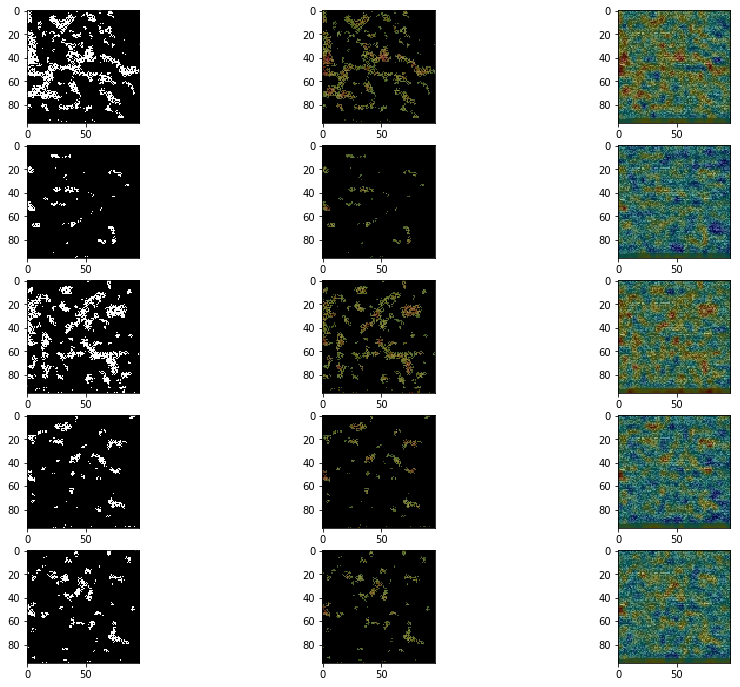

In [9]:
plt.figure(figsize=(15,12))
plt.subplot(5,3,1)
plt.imshow(mask,cmap="gray")
plt.subplot(5,3,2)
plt.imshow(res)
plt.subplot(5,3,3)
plt.imshow(img_rgb)
plt.subplot(5,3,4)
plt.imshow(mask1,cmap="gray")
plt.subplot(5,3,5)
plt.imshow(res1)
plt.subplot(5,3,6)
plt.imshow(img_rgb1)
plt.subplot(5,3,7)
plt.imshow(mask2,cmap="gray")
plt.subplot(5,3,8)
plt.imshow(res2)
plt.subplot(5,3,9)
plt.imshow(img_rgb2)
plt.subplot(5,3,10)
plt.imshow(mask3,cmap="gray")
plt.subplot(5,3,11)
plt.imshow(res3)
plt.subplot(5,3,12)
plt.imshow(img_rgb3)
plt.subplot(5,3,13)
plt.imshow(mask4,cmap="gray")
plt.subplot(5,3,14)
plt.imshow(res4)
plt.subplot(5,3,15)
plt.imshow(img_rgb4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

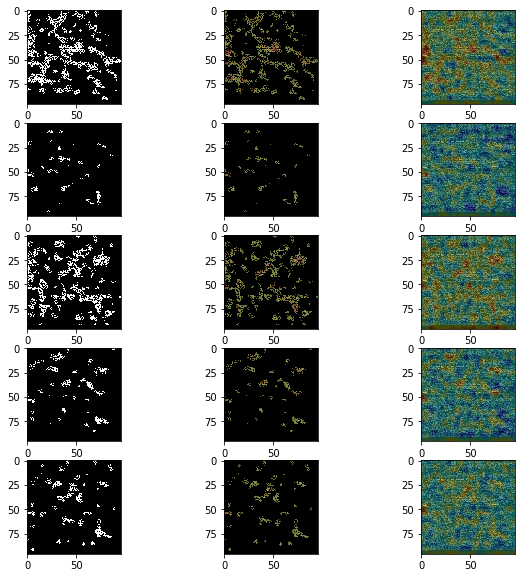

In [36]:
plt.figure(figsize=(10,10))
plt.subplot(5,3,1)
plt.imshow(mask,cmap="gray")
plt.subplot(5,3,2)
plt.imshow(res)
plt.subplot(5,3,3)
plt.imshow(img_rgb)
plt.subplot(5,3,4)
plt.imshow(mask1,cmap="gray")
plt.subplot(5,3,5)
plt.imshow(res1)
plt.subplot(5,3,6)
plt.imshow(img_rgb1)
plt.subplot(5,3,7)
plt.imshow(mask2,cmap="gray")
plt.subplot(5,3,8)
plt.imshow(res2)
plt.subplot(5,3,9)
plt.imshow(img_rgb2)
plt.subplot(5,3,10)
plt.imshow(mask3,cmap="gray")
plt.subplot(5,3,11)
plt.imshow(res3)
plt.subplot(5,3,12)
plt.imshow(img_rgb3)
plt.subplot(5,3,13)
plt.imshow(mask4,cmap="gray")
plt.subplot(5,3,14)
plt.imshow(res4)
plt.subplot(5,3,15)
plt.imshow(img_rgb4)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

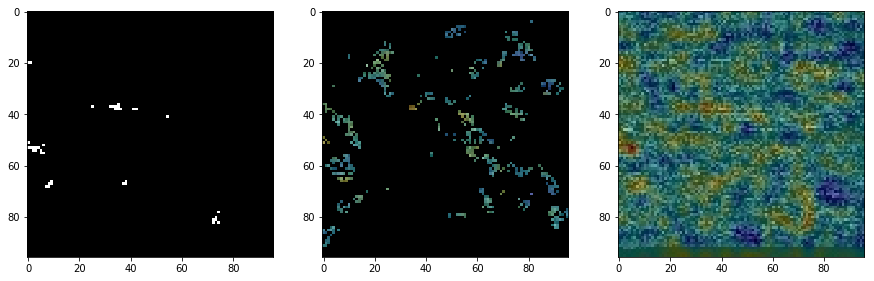

In [8]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(mask2,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(res2)
plt.subplot(1,3,3)
plt.imshow(img_rgb2)
plt.show

In [ ]:
plt.figure(figsize=(25,8))
plt.bar(x,mask, color= 'blue', label= 'blue',width = 1.4)
# plt.bar(x,g_seq, color = 'green', label= 'green',width = 1.4)
plt.bar(x,r_seq, color= 'red', label = 'red', width = 1.4)
plt.show()

In [10]:
b,g,r = cv2.split(res)
b1,g1,r1 = cv2.split(img1)
b2,g2,r2 = cv2.split(img2)
b3,g3,r3 = cv2.split(img3)
b4,g4,r4 = cv2.split(img4)
# b5,g5,r5 = cv2.split(img5)

In [11]:
imsize = 96

In [12]:
r_seq = r.reshape(imsize*imsize)
b_seq = b.reshape(imsize*imsize)
g_seq = g.reshape(imsize*imsize)
r_seq1 = r1.reshape(imsize*imsize)
b_seq1 = b1.reshape(imsize*imsize)
g_seq1 = g1.reshape(imsize*imsize)
r_seq2 = r2.reshape(imsize*imsize)
b_seq2 = b2.reshape(imsize*imsize)
g_seq2 = g2.reshape(imsize*imsize)
r_seq3 = r3.reshape(imsize*imsize)
b_seq3 = b3.reshape(imsize*imsize)
g_seq3 = g3.reshape(imsize*imsize)
r_seq4 = r4.reshape(imsize*imsize)
b_seq4 = b4.reshape(imsize*imsize)
g_seq4 = g4.reshape(imsize*imsize)
# r_seq5 = r5.reshape(imsize*imsize)
# b_seq5 = b5.reshape(imsize*imsize)
# g_seq5 = g5.reshape(imsize*imsize)

In [13]:
x = np.arange(imsize*imsize)
print(x)
# h,s,v = cv2.split(res_hsv)
# h_seq = h.reshape(imsize*imsize)
# s_seq = s.reshape(imsize*imsize)
# v_seq = v.reshape(imsize*imsize)

[   0    1    2 ... 9213 9214 9215]


In [ ]:
print(r_seq.shape)
toplist = sorted(range(len(r_seq)), key=lambda i: r_seq[i])[-200:]
print(toplist)
print(r_seq[toplist])
print(len(toplist))
print(r_seq[toplist].shape)
print(r_seq[toplist].tolist())

In [ ]:
top_collection = []
top_collection.append(top_200_idx)
top_collection.append(toplist)
print(top_collection)

In [ ]:
print(r_seq1.shape)
toplist = sorted(range(len(r_seq1)), key=lambda i: r_seq1[i])[-100:]
print(toplist)
print(r_seq[toplist])

In [ ]:
top_200_idx = np.argsort(r_seq1)[-200:]
top_200_values = [r_seq1[i] for i in top_200_idx]
print(top_200_idx)
print(top_200_values)

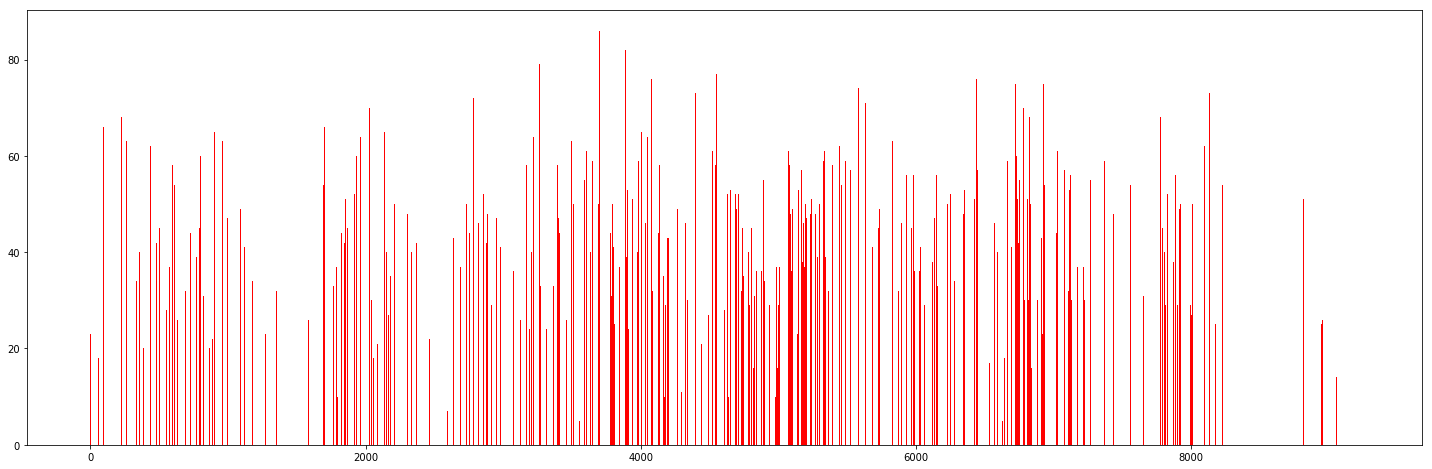

In [15]:
plt.figure(figsize=(25,8))
# plt.bar(x,h_seq, color= 'blue', label= 'blue',width = 1.4)
# plt.bar(x,s_seq, color = 'green', label= 'green',width = 1.4)
plt.bar(x,r_seq, color= 'red', label = 'red', width = 1.4)
plt.show()

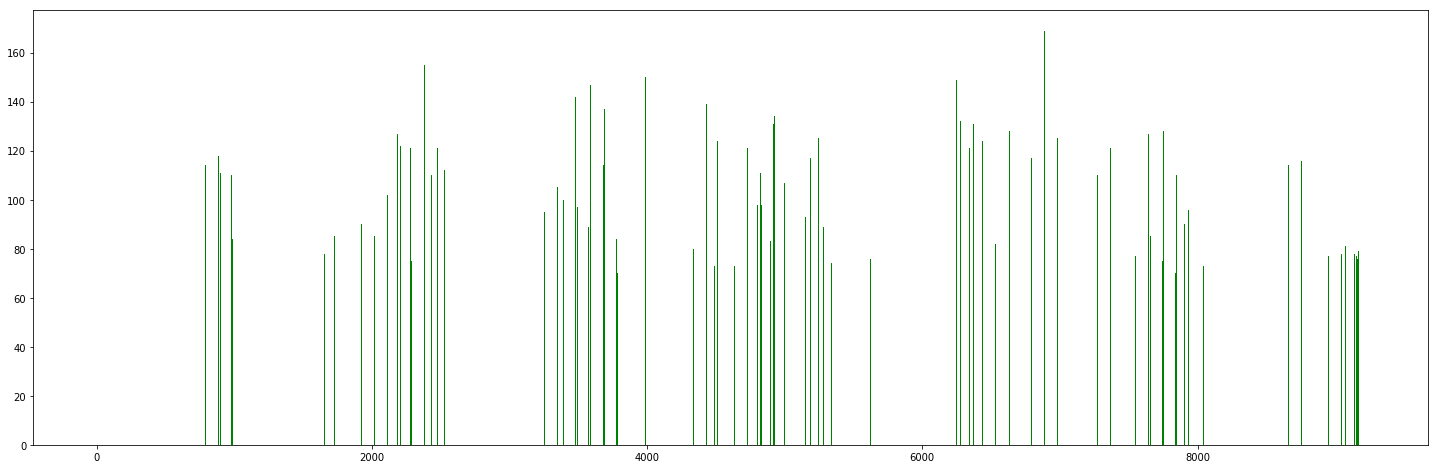

In [45]:
plt.figure(figsize=(25,8))
# plt.bar(x,h_seq, color= 'blue', label= 'blue',width = 1.4)
plt.bar(x,g_seq, color = 'green', label= 'green',width = 1.4)
# plt.bar(x,v_seq, color= 'red', label = 'red', width = 1.4)
plt.show()

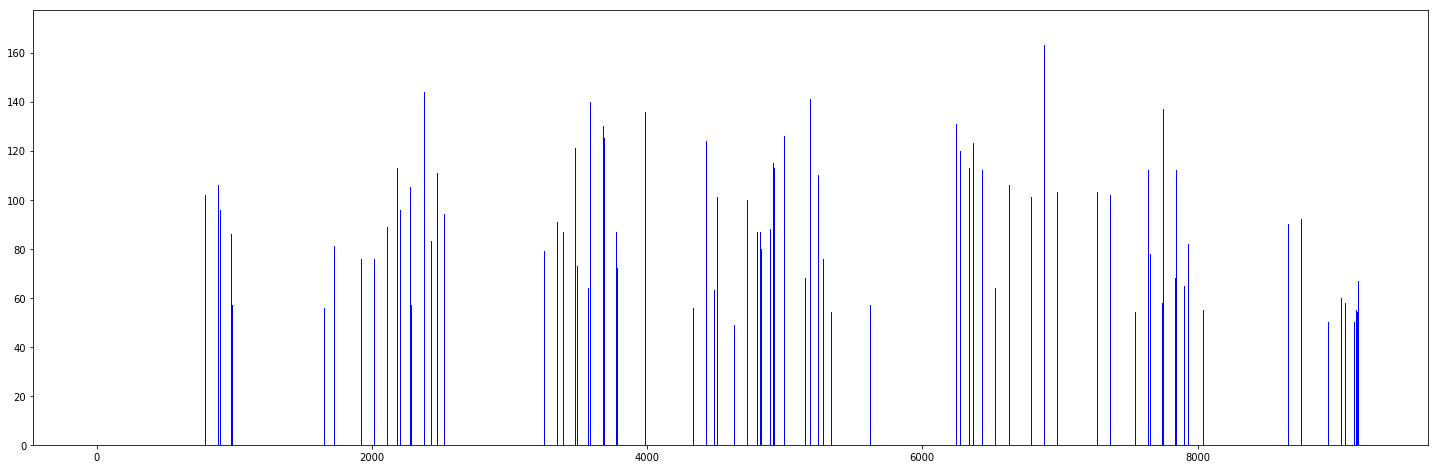

In [46]:
plt.figure(figsize=(25,8))
plt.bar(x,b_seq, color= 'blue', label= 'blue',width = 1.4)
# plt.bar(x,s_seq, color = 'green', label= 'green',width = 1.4)
# plt.bar(x,v_seq, color= 'red', label = 'red', width = 1.4)
plt.show()

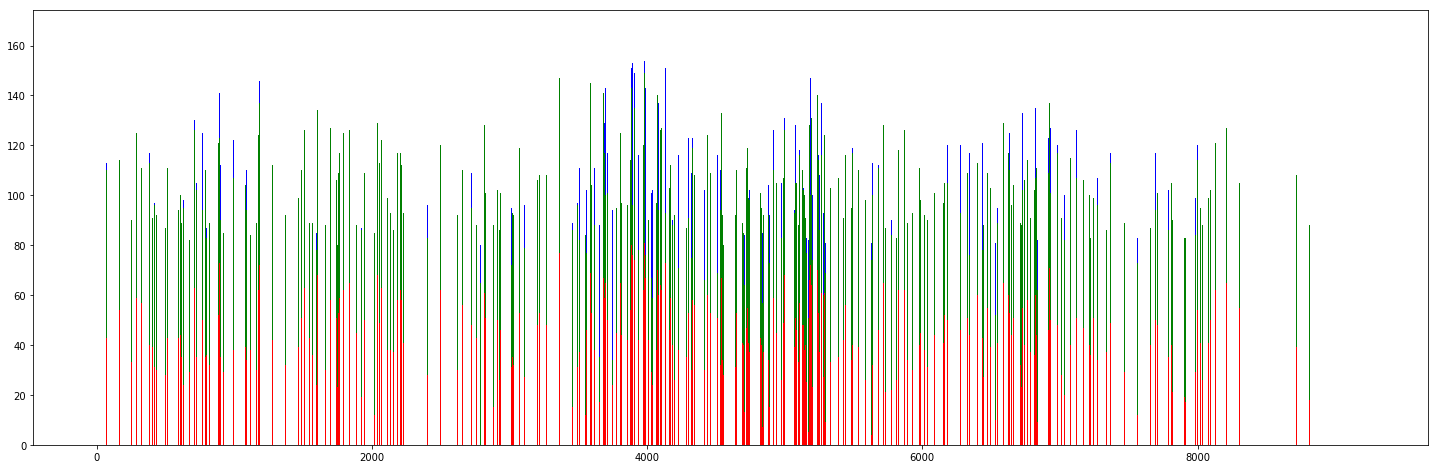

In [14]:
plt.figure(figsize=(25,8))
plt.bar(x,b_seq, color= 'blue', label= 'blue',width = 1.4)
plt.bar(x,g_seq, color = 'green', label= 'green',width = 1.4)
plt.bar(x,r_seq, color= 'red', label = 'red', width = 1.4)
plt.show()

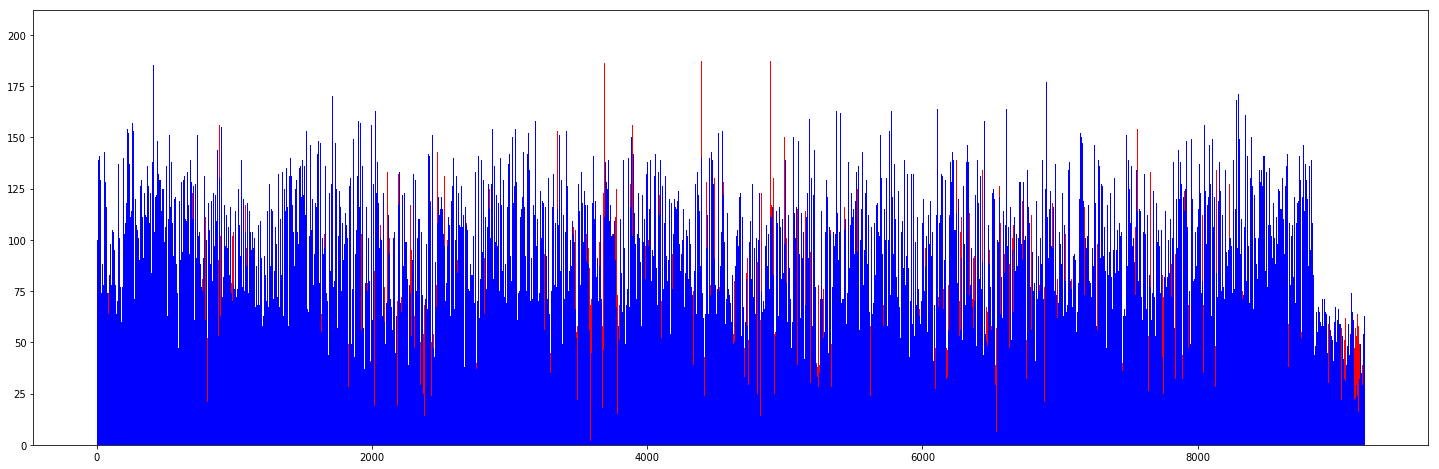

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(25,8))
plt.bar(x,r_seq1, color= 'red', label = 'red',width = 1.2)
plt.bar(x,b_seq1, color= 'blue', label= 'blue',width = 1.2)
# plt.bar(x,g_seq, color = 'green', label= 'green')
plt.show()

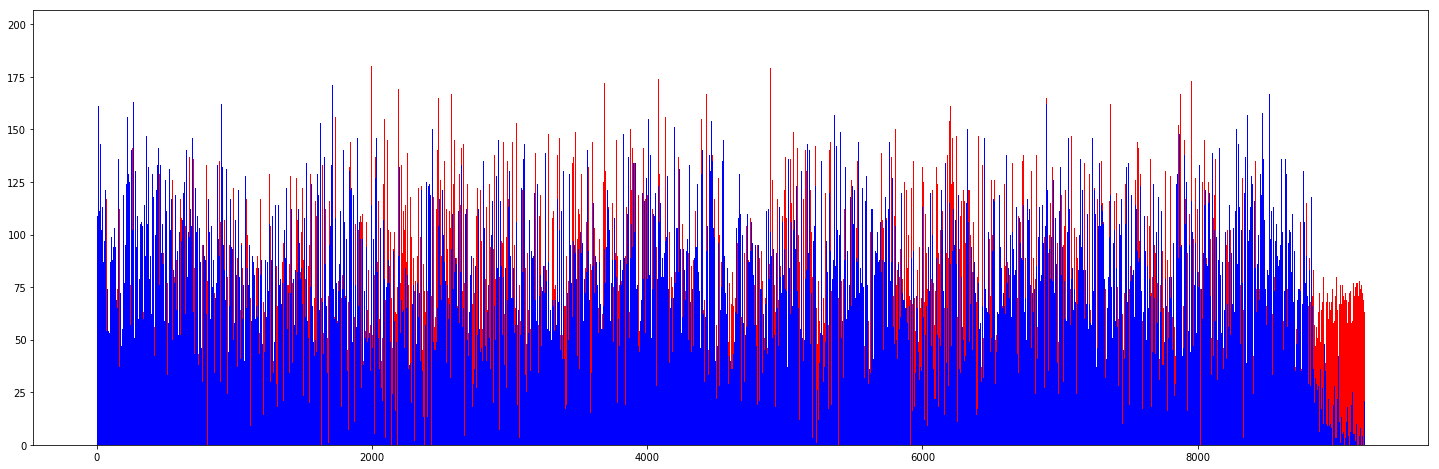

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(25,8))
plt.bar(x,r_seq2, color= 'red', label = 'red',width = 1.2)
plt.bar(x,b_seq2, color= 'blue', label= 'blue',width = 1.2)
# plt.bar(x,g_seq, color = 'green', label= 'green')
plt.show()
plt.savefig('Cervical2_plot.jpg')

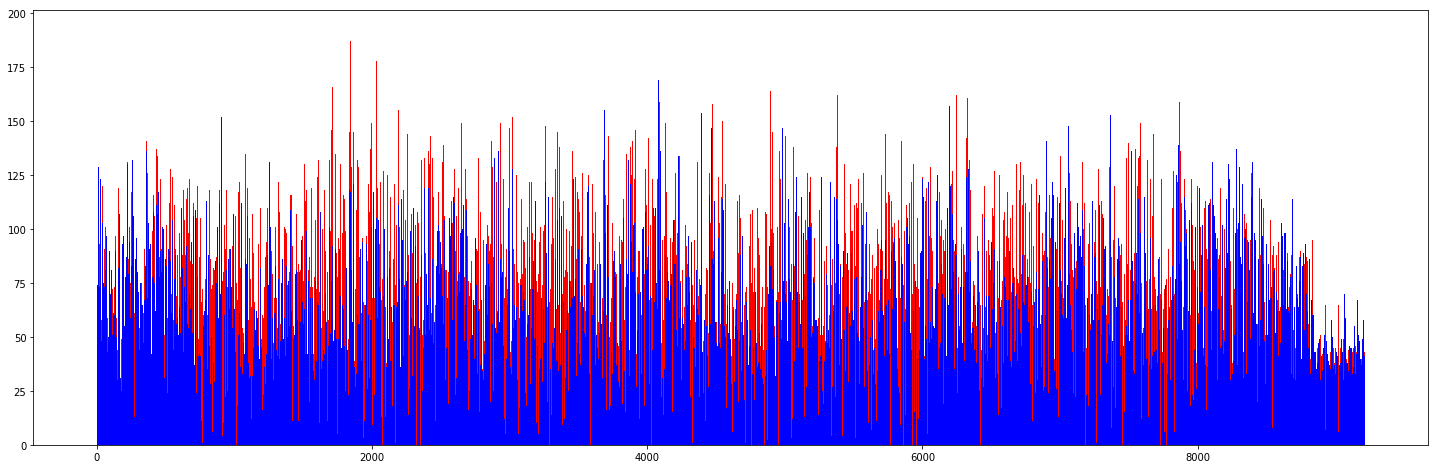

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(25,8))
plt.bar(x,r_seq3, color= 'red', label = 'red',width = 1.2)
plt.bar(x,b_seq3, color= 'blue', label= 'blue',width = 1.2)
# plt.bar(x,g_seq, color = 'green', label= 'green')
plt.show()
plt.savefig('Oral0_plot.jpg')

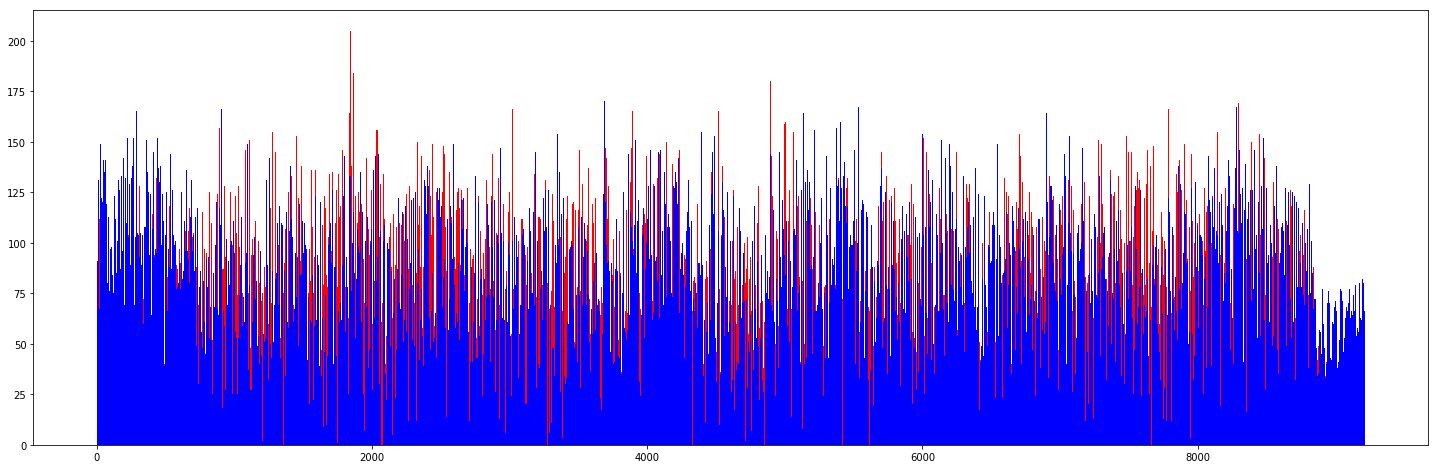

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(25,8))
plt.bar(x,r_seq4, color= 'red', label = 'red',width = 1.2)
plt.bar(x,b_seq4, color= 'blue', label= 'blue',width = 1.2)
# plt.bar(x,g_seq, color = 'green', label= 'green')
plt.show()
plt.savefig('Oral1_plot.jpg')

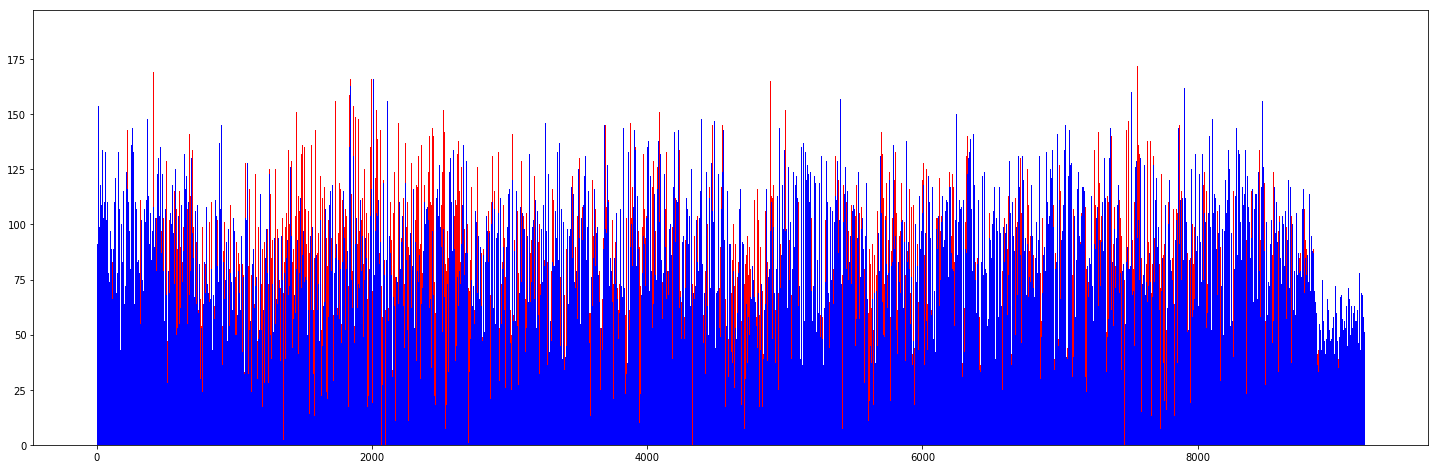

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(25,8))
plt.bar(x,r_seq5, color= 'red', label = 'red',width = 1.2)
plt.bar(x,b_seq5, color= 'blue', label= 'blue',width = 1.2)
# plt.bar(x,g_seq, color = 'green', label= 'green')
plt.show()
plt.savefig('Oral2_plot.jpg')

In [ ]:
for i in [0]:
    print("NOW IN FOLD: {}".format(i))
    def_path='/home/DL-based-Tumor-Classification/Datasets/Newest_case/1D/Oral+Carcinoma+Adenocarcinoma98/img_fold{}'.format(i)
    default_path=def_path+'/Grads'
    feature_path = '/home/DL-based-Tumor-Classification/Datasets/Newest_case'
    imsize = 98

    file = []
    avg_img = []
    avg_img1 = []
    gray_file_0 = []
    gray_file_1 = []
    r_file_0 = []
    g_file_0 = []
    b_file_0 = []
    r_file_1 = []
    g_file_1 = []
    b_file_1 = []

    for filename in os.listdir(default_path):
        if filename.endswith(".ipynb_checkpoints"):
            continue
        file_name_seq = []
        file_name_seq = filename.split("_")
        if(file_name_seq[0] != 'guided-gradcam'):
            continue
#         print(filename)
#         img = cv2.imread(default_path+'/'+filename)
        img_gray = cv2.imread(default_path+'/'+filename, cv2.IMREAD_GRAYSCALE)
#         img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         hsv_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

#         lower_red = (0,120,80)
#         upper_red = (45,255,255)
#         mask = cv2.inRange(hsv_img, lower_red, upper_red)
#         res = cv2.bitwise_and(img_rgb,img_rgb, mask=mask)
        
#         r,g,b = cv2.split(res)
        
        gray_seq = img_gray.reshape(imsize*imsize)
#         r_seq = r.reshape(imsize*imsize)
#         b_seq = b.reshape(imsize*imsize)
#         g_seq = g.reshape(imsize*imsize)

        cam_type,code,img_name = filename.split("_",2)
        
        if code == '1':
            gray_file_0.append(gray_seq)
#             r_file_0.append(r_seq)
#             g_file_0.append(g_seq)
#             b_file_0.append(b_seq)
            avg_img.append(img_gray)
        elif code == '3':
            gray_file_1.append(gray_seq)
#             r_file_0.append(r_seq)
#             g_file_0.append(g_seq)
#             b_file_0.append(b_seq)
            avg_img1.append(img_gray)
#         elif code == '6':
#             gray_file_2.append(gray_seq)
# #             r_file_1.append(r_seq)
# #             g_file_1.append(g_seq)
# #             b_file_1.append(b_seq)
#             avg_img2.append(img_gray)


#     kelas0_r = np.asarray(r_file_0)
    kelas0_gray = np.asarray(gray_file_0)
    kelas1_gray = np.asarray(gray_file_1)
#     kelas0_g = np.asarray(g_file_0)
#     kelas0_b = np.asarray(b_file_0)
#     kelas1_r = np.asarray(r_file_1)
#     kelas1_g = np.asarray(g_file_1)
#     kelas1_b = np.asarray(b_file_1)
#     print(kelas0_r.shape)
#     print(kelas0)
#     print(kelas1.shape)
#     print(kelas1)
#     average0_r = np.mean(kelas0_r, axis=0)
    
    average0_gray = np.mean(kelas0_gray,axis=0)
    average1_gray = np.mean(kelas1_gray,axis=0)
    
    sum0_gray =  np.sum(kelas0_gray, axis=0)
    sum1_gray =  np.sum(kelas1_gray,axis=0)
    normalized0_gray = sum0_gray / np.max(sum0_gray) * 255
    normalized1_gray = sum1_gray / np.max(sum1_gray) * 255 
    
    average_img = np.mean(avg_img,axis = 0)
    average_img = average_img.astype(np.uint8)
    average_img1 = np.mean(avg_img1,axis = 0)
    average_img1 = average_img1.astype(np.uint8)
    
#     average0_g = np.average(kelas0_g, axis=0)
#     average0_b = np.average(kelas0_b, axis=0)
#     average1_r = np.average(kelas1_r,axis=0)
#     average1_g = np.average(kelas1_g,axis=0)
#     average1_b = np.average(kelas1_b,axis=0)
#     Score0 = np.average(kelas0_r - np.average(kelas0_g + kelas0_b, axis = 0), axis=0)
#     Score1 = np.average(kelas1_r - np.average(kelas1_g + kelas1_b, axis = 0), axis=0)
    # print(average0.shape)
    # print(average0)
#     top_400_values0 = [average0_gray[i] for i in top_400_kelas0]
#     top_400_green0 = [average0_g[i] for i in green_0]
#     print(top_400_values0)
#     print(top_400_green0)
#     top_400_values1 = [average1_gray[i] for i in top_400_kelas1]
    
#     top_400_kelas0_score = np.argsort(Score0)
#     top_400_kelas1_score = np.argsort(Score1)
#     top_400_Score0 = [average0_r[i] for i in top_400_kelas0_score]
#     top_400_Score1 = [average1_r[i] for i in top_400_kelas1_score]
    
#     value_1 = np.asarray(top_400_values0)
#     value_2 = np.asarray(top_400_values1)
    
#     Score_1 = np.asarray(top_400_Score0)
#     Score_2 = np.asarray(top_400_Score1)
#     total_len0 = len(average0_r)
#     print(total_len0)
#     top_400_kelas0 = np.argsort(average0_r)[-400:]
#     top_400_kelas1 = np.argsort(average1_r)[-400:]
#     top_400_kelas0_score = np.argsort(Score0)[-400:]
#     top_400_kelas1_score = np.argsort(Score1)[-400:]
    
#     print(top_400_kelas0_score)
#     print(top_400_kelas1_score))

    top_400_kelas0 = np.argsort(average0_gray)[-800:]
    top_400_kelas0 = top_400_kelas0[::-1]
    top_400_kelas1 = np.argsort(average1_gray)[-800:]
    top_400_kelas1 = top_400_kelas0[::-1] 
        
    top_400_kelas0_value = np.sort(average0_gray)[-800:]
    top_400_kelas0_value = top_400_kelas0_value[::-1]
    top_400_kelas1_value = np.sort(average1_gray)[-800:]
    top_400_kelas1_value = top_400_kelas1_value[::-1]

    top_400_kelas0_norm = np.argsort(normalized0_gray)[-800:]
    top_400_kelas0_norm = top_400_kelas0_norm[::-1]
    top_400_kelas1_norm = np.argsort(normalized1_gray)[-800:]
    top_400_kelas1_norm = top_400_kelas0_norm[::-1]
    
    top_400_kelas0_norm_val = np.sort(normalized0_gray)[-800:]
    top_400_kelas0_norm_val = top_400_kelas0_norm_val[::-1]
    top_400_kelas1_norm_val = np.sort(normalized1_gray)[-800:]
    top_400_kelas1_norm_val = top_400_kelas0_norm_val[::-1]
    
    #     arr = average_img
#     if(arr.max() != 0):
#         arr = ((arr - arr.min()) * (1/(arr.max() - arr.min()) * 255).astype('uint8'))
#     arr1 = average_img1
#     if(arr1.max() !=0):
#         arr1 = ((arr1 - arr1.min()) * (1/(arr1.max() - arr1.min()) * 255).astype('uint8'))
#     cv2.imwrite(default_path+'/__Class_Oral_mean_latest.png', arr)
#     cv2.imwrite(default_path+'/__Class_Other_mean_latest.png', arr1)

    df = pd.DataFrame(top_400_kelas0)
    df.to_csv(def_path+'/class_1_top_800_mean.csv', index=False)
    df1 = pd.DataFrame(top_400_kelas1)
    df1.to_csv(def_path+'/class_2_top_800_mean.csv', index=False)
    
    df = pd.DataFrame(top_400_kelas0_norm)
    df.to_csv(def_path+'/class_1_top_800_norm.csv', index=False)
    df1 = pd.DataFrame(top_400_kelas1_norm)
    df1.to_csv(def_path+'/class_2_top_800_norm.csv', index=False)
    
    df = pd.DataFrame(top_400_kelas0_norm_val)
    df.to_csv(def_path+'/class_1_top_800_norm_val.csv', index=False)
    df1 = pd.DataFrame(top_400_kelas1_norm_val)
    df1.to_csv(def_path+'/class_2_top_800_norm_val.csv', index=False)

    df_score = pd.DataFrame(top_400_kelas0_value)
    df_score.to_csv(def_path+'/class_1_top_800_value.csv', index=False)
    df1_score = pd.DataFrame(top_400_kelas1_value)
    df1_score.to_csv(def_path+'/class_2_top_800_value.csv', index=False)

#     df = pd.DataFrame(top_400_kelas0_score)
#     df.to_csv(def_path+'/class_1_panda_score.csv', index=False)
#     df1 = pd.DataFrame(top_400_kelas1_score)
#     df1.to_csv(def_path+'/class_2_panda_score.csv', index=False)
print('done')